Question no.4 :- Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm.

Answer no.4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
data = pd.read_csv("/content/sample_data/online_shoppers_intention.csv")

In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
data.duplicated().sum()

125

In [8]:
data.shape

(12330, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
# Changing datatype of target column to categorical
data['Revenue'] = data['Revenue'].astype(str)

In [13]:
# extracting required features for revenue prediction
features = data.drop(['Revenue'], axis=1)

In [14]:
# Changing weekend column to numerical
features['Weekend'] = features['Weekend'].astype(int)

In [18]:
# Changing informational duration column to numerical
features['Informational_Duration'] = features['Informational_Duration'].apply(lambda x: 1 if x > 0 else 0)

In [20]:
# Encode categorical features
features = pd.get_dummies(features)

In [22]:
target = data['Revenue']

Text(0.5, 1.0, 'Total customers that bought an item')

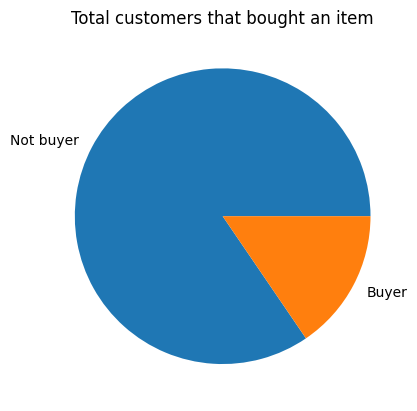

In [23]:
plt.pie(target.value_counts(), labels=['Not buyer','Buyer'])
plt.title('Total customers that bought an item')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [40]:
# using Random Forest for informational duration
R_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [34]:
R_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = R_forest.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [38]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9055150040551501
Confusion Matrix:
[[2017   65]
 [ 168  216]]
